In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load the time series data
data = pd.read_csv('ts_detached.csv', parse_dates=['Date'], index_col='Date')

In [3]:
data.head()

,Detached
Date,
1995-01-31,9473
1995-02-28,9667
1995-03-31,13431
1995-04-30,11929
1995-05-31,13169


<Figure size 1000x600 with 0 Axes>

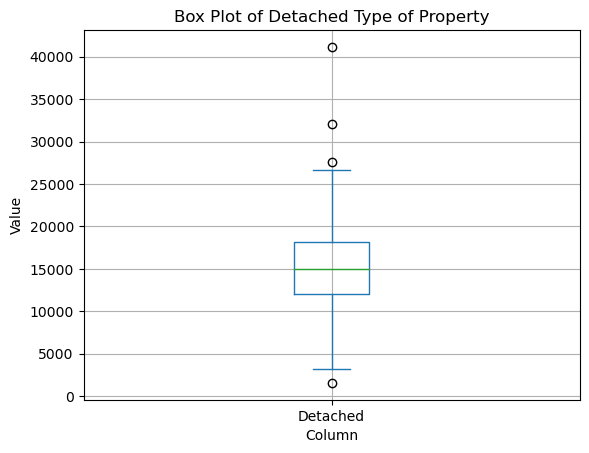

In [4]:
# Create the box plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
data.plot(kind="box")
plt.title("Box Plot of Detached Type of Property")
plt.xlabel("Column")
plt.ylabel("Value")
plt.grid(True)

# Display the plot
plt.show()

In [4]:
# Ensure the data is in monthly frequency
#data = data.resample('M').sum()

### DIFFERENCING FOR STATIONARY 

In [5]:
# Compute the first difference
#diff = data.diff().dropna()

In [6]:
#diff.head()

### DECOMPOSITION

In [8]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data, model='additive')

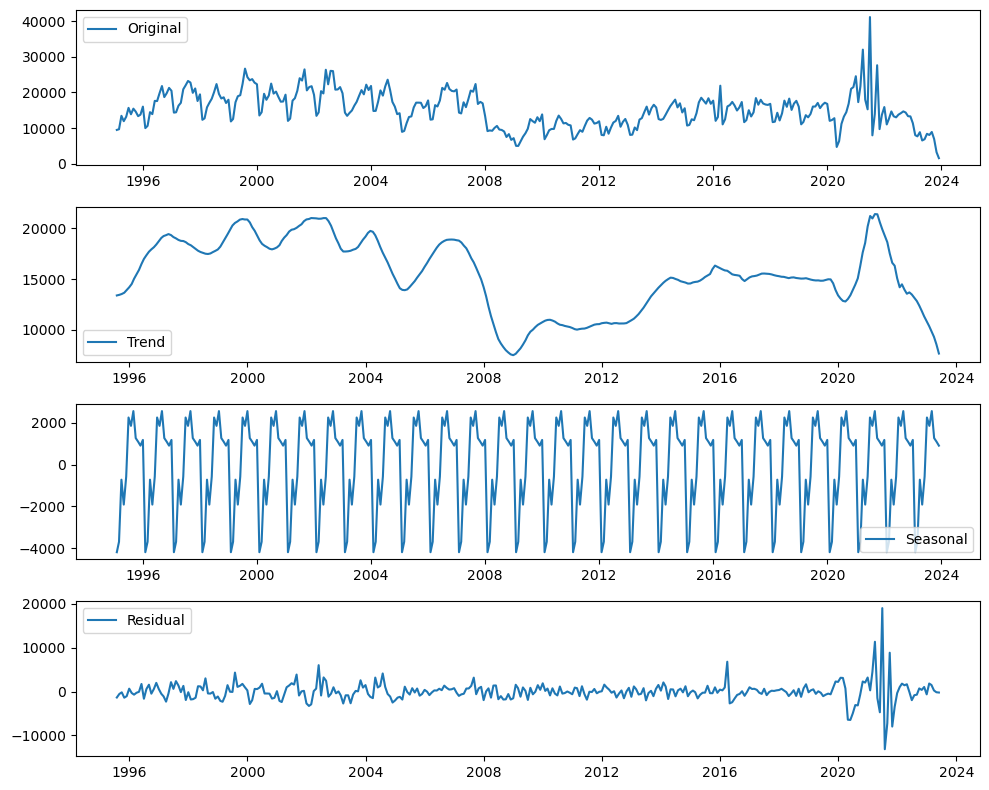

In [9]:
# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# ARIMA model
model = ARIMA(data, order=(5,1,0))
results = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [11]:
# Predictions
n_periods = 12  # number of periods to forecast
forecast = results.forecast(steps=n_periods)

In [12]:
print(forecast)

2023-12-31    2476.312578
2024-01-31    1557.605616
2024-02-29    1544.443170
2024-03-31    2314.762435
2024-04-30    1882.126497
2024-05-31    1835.579954
2024-06-30    2211.643311
2024-07-31    1944.902193
2024-08-31    1909.408634
2024-09-30    2110.308961
2024-10-31    1965.159419
2024-11-30    1948.277702
Freq: M, Name: predicted_mean, dtype: float64


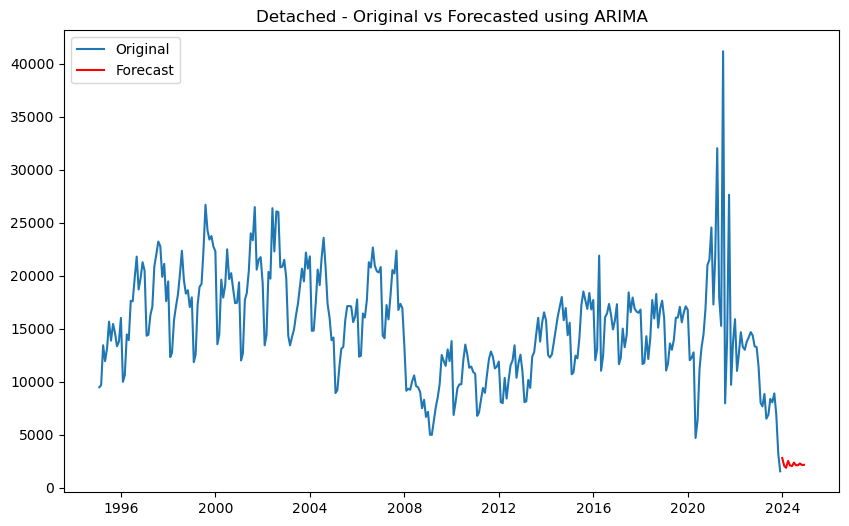

In [18]:
# Plotting original and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Detached - Original vs Forecasted using ARIMA')
plt.legend()
plt.show()


### 2 1 2 P D Q

In [14]:
# ARIMA model
model = ARIMA(data, order=(2,1,2))
results = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [15]:
# Predictions
n_periods = 12  # number of periods to forecast
forecast = results.forecast(steps=n_periods)

In [16]:
print(forecast)

2023-12-31    2799.549518
2024-01-31    2060.463422
2024-02-29    1878.063543
2024-03-31    2518.747674
2024-04-30    2085.471794
2024-05-31    2040.142287
2024-06-30    2362.604716
2024-07-31    2114.138255
2024-08-31    2117.537737
2024-09-30    2277.105680
2024-10-31    2137.260658
2024-11-30    2153.512817
Freq: M, Name: predicted_mean, dtype: float64


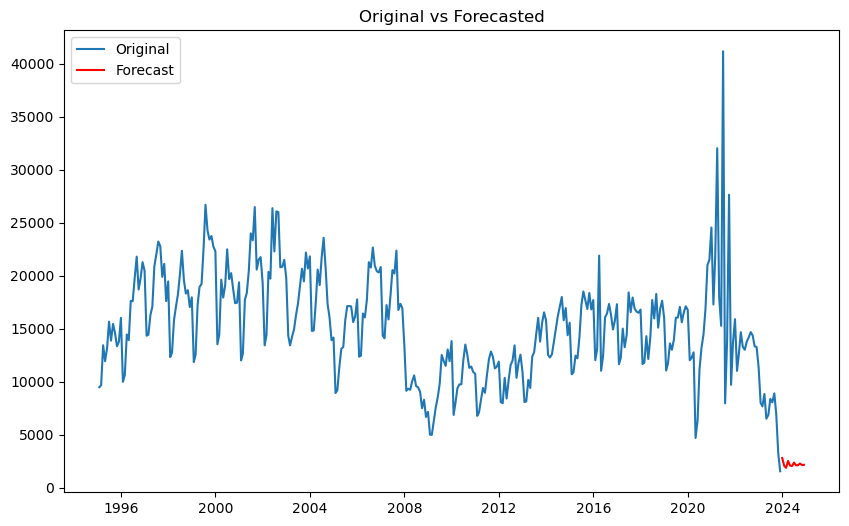

In [17]:
# Plotting original and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Original vs Forecasted')
plt.legend()
plt.show()